Linear regression.

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [7]:
# read data

filepath = '../Data/'
DATA_dict = dict()
num_traj = 40
for i in range(num_traj):
    num = i+1;
    if num >= 10:
        str_num = str(num) # no leading zero
    else:
        str_num = '0'+str(num) # add leading zero
    filename = 'trajdata_'+str_num+'.csv'
    with open(filepath+filename, 'r') as f:
        # remove top row, and store the rest in dictionary
        DATA_dict[i] = np.genfromtxt(f, dtype='f4', delimiter=',', skip_header=1)

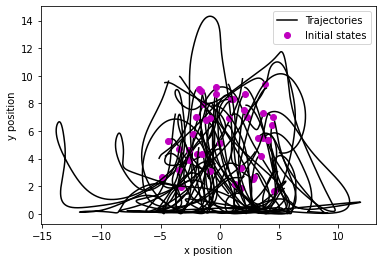

In [8]:
# Plot all position trajectories

for i in range(num_traj-1):
    curr_traj = DATA_dict[i]
    plt.plot(curr_traj[:,1],curr_traj[:,2],'k-') # plot trajectory path
    plt.plot(curr_traj[0,1],curr_traj[0,2],'mo') # plot initial position

# Show legend on last trajectory
curr_traj = DATA_dict[num_traj-1]
plt.plot(curr_traj[:,1],curr_traj[:,2],'k-',label='Trajectories')
plt.plot(curr_traj[0,1],curr_traj[0,2],'mo',label='Initial states')

plt.xlabel('x position')
plt.ylabel('y position')
plt.legend()
plt.show()

## Learn from one trajectory

In [9]:
# We select the first trajectory as the training set
X = DATA_dict[0][:-1,1:]
Y = DATA_dict[0][1:,1:4]

In [10]:
reg = LinearRegression().fit(X, Y)

In [11]:
print('The matrix coefficient is\n',reg.coef_)
print('The vector intercept is\n',reg.intercept_)

The matrix coefficient is
 [[ 1.0003701e+00  1.3744233e-03  6.3371691e-03  3.8129976e-05
   6.7513865e-05]
 [ 3.3025382e-04  1.0013986e+00  3.3694841e-03  1.2218952e-05
   6.5317377e-05]
 [ 7.7857834e-04 -1.1052340e-03  9.9729413e-01 -2.2269785e-05
  -3.4325058e-06]]
The vector intercept is
 [0.00073528 0.00252265 0.0109821 ]


In [21]:
# We select the last trajectory as the test set
X_test = DATA_dict[39][:-1,1:]
Y_test = DATA_dict[39][1:,1:4]

In [22]:
R2 = reg.score(X_test, Y_test)
print('The R^2 score is', R2)

The R^2 score is 0.999937122325328


In [23]:
Y_pred = reg.predict(X_test)
MSE = mean_squared_error(Y_test, Y_pred)
print('The MSE is',MSE)

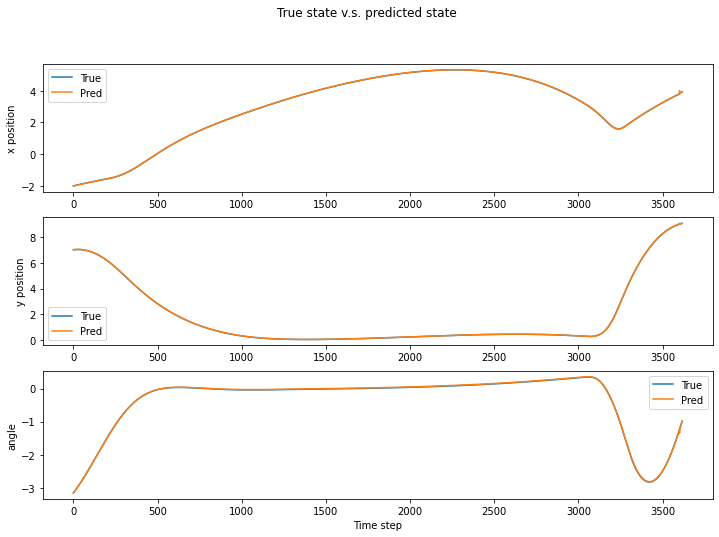

In [24]:
T = range(Y_test.shape[0])
fig, axs = plt.subplots(3,figsize=[12,8])
fig.suptitle('True state v.s. predicted state')
axs[0].plot(T,Y_test[:,0], T,Y_pred[:,0])
axs[1].plot(T,Y_test[:,1], T,Y_pred[:,1])
axs[2].plot(T,Y_test[:,2], T,Y_pred[:,2])
axs[0].set_ylabel('x position')
axs[1].set_ylabel('y position')
axs[2].set_ylabel('angle')
axs[2].set_xlabel('Time step')
axs[0].legend(['True','Pred'])
axs[1].legend(['True','Pred'])
axs[2].legend(['True','Pred'])

In [25]:
fig.savefig('linear-one-traj-learn.png')

## Learn from multiple trajectory

In [26]:
# We select the first 30 trajectory as the training set
X = np.zeros((0,5))
Y = np.zeros((0,3))
N = 30
for i in range(N):
    X = np.vstack((X,DATA_dict[i][:-1,1:]))
    Y = np.vstack((Y,DATA_dict[i][1:,1:4]))

In [27]:
reg2 = LinearRegression().fit(X, Y)
print('The matrix coefficient is\n',reg2.coef_)
print('The vector intercept is\n',reg2.intercept_)

The matrix coefficient is
 [[ 1.00002416e+00 -1.07555773e-04 -3.98102116e-05  3.81133989e-06
   4.99979682e-06]
 [-6.14481978e-06  1.00011934e+00  4.30218756e-05  1.90756242e-05
  -1.87767633e-06]
 [-1.80774242e-05  1.00364474e-04  1.00016212e+00  3.21962063e-06
   3.52647474e-05]]
The vector intercept is
 [-0.00020432 -0.00237304 -0.00017836]


In [28]:
# We select the last 10 trajectory as the test set
X_test = np.zeros((0,5))
Y_test = np.zeros((0,3))

X_test = np.zeros((0,5))
Y_test = np.zeros((0,3))
M = 10
for i in range(M):
    X_test = np.vstack((X_test,DATA_dict[39-i][:-1,1:]))
    Y_test = np.vstack((Y_test,DATA_dict[39-i][1:,1:4]))

In [30]:
R2 = reg2.score(X_test, Y_test)
print('The R^2 score is', R2)

The R^2 score is 0.9999955036094202


In [31]:
Y_pred = reg2.predict(X_test)
MSE = mean_squared_error(Y_test, Y_pred)
print('The MSE is',MSE)

The MSE is 3.5694539511011327e-05


In [34]:
X_test_last = DATA_dict[39][:-1,1:]
Y_test_last = DATA_dict[39][1:,1:4]
Y_pred = reg2.predict(X_test_last)

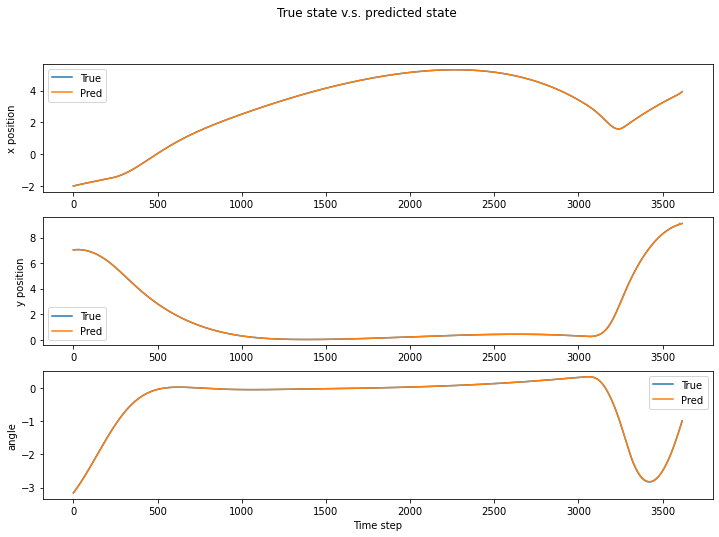

In [35]:
T = range(Y_test_last.shape[0])
fig, axs = plt.subplots(3,figsize=[12,8])
fig.suptitle('True state v.s. predicted state')
axs[0].plot(T,Y_test_last[:,0], T,Y_pred[:,0])
axs[1].plot(T,Y_test_last[:,1], T,Y_pred[:,1])
axs[2].plot(T,Y_test_last[:,2], T,Y_pred[:,2])
axs[0].set_ylabel('x position')
axs[1].set_ylabel('y position')
axs[2].set_ylabel('angle')
axs[2].set_xlabel('Time step')
axs[0].legend(['True','Pred'])
axs[1].legend(['True','Pred'])
axs[2].legend(['True','Pred'])

In [36]:
fig.savefig('linear-multi-traj-learn.png')